# 无监督学习
- 无监督学习：利用无标签的数据学习数据的分布或数据与数据之间的关系被称为无监督学习
- 无监督学习最常用的场景为**聚类**和**降维**
## 聚类
- 聚类：根据数据的“相似性”将数据分为多类的过程称为聚类
- 常用距离（相似性）计算方法：
    1. 欧氏距离：$$d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$
    2. 曼哈顿距离：$$d(x,y)=\sum_{i=1}^{n}|x_i-y_i|$$
    3. 马氏距离：$$d(x,y)=\sqrt{(x-y)^T\Sigma^{-1}(x-y)}$$
    4. 余弦相似度：$$d(x,y)=\frac{x^Ty}{\|x\|\|y\|}$$

In [7]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## K-means聚类
- K-means聚类：将数据分为K类，使得同一类中的数据点尽可能相似，不同类中的数据点尽可能不同
- K-means聚类算法步骤：
    1. 随机选择K个初始质心
    2. 计算每个数据点与质心的距离，并将数据点分配给最近的质心
    3. 重新计算每个类的质心
    4. 重复步骤2和3，直到质心不再变化或达到最大迭代次数
- K-means聚类优缺点：
    - 优点：简单易懂，计算速度快，适用于大规模数据
    - 缺点：需要预先指定K值，对初始质心敏感，容易陷入局部最优
        - 解决方法：多次运行K-means，选择最优结果；使用K-means++初始化质心

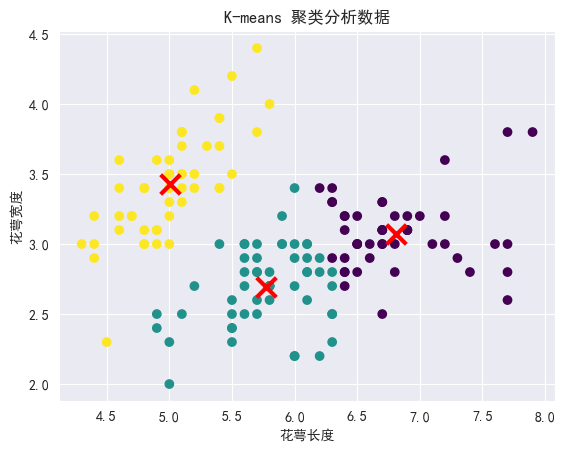

In [8]:
# 导入必要的库
from sklearn.cluster import KMeans

# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 显示负号
plt.rcParams['axes.unicode_minus'] = False

# ==================
# 1. 导入数据
# ==================
iris = datasets.load_iris()
x = iris.data
X_2d = x[:, :2] # 取前两个特征,便于可视化

# ==================
# 2. K-means聚类
# ==================
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_2d)

# ==================
# 3. 可视化
# ==================
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           marker='x', s=200, linewidths=3, color='red')
plt.xlabel('花萼长度')
plt.ylabel('花萼宽度')
plt.title('K-means 聚类分析数据')
plt.show()